# Data Science Salaries
## (Dashboard included)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

First I load in the dataset, and then groupby the median salary for each title.

In [2]:
# We want to compare the job role to median salary of the job role

ds = pd.read_csv("ds_salaries.csv")
display(ds.head())
s_usd = ds[ds.salary_currency == "USD"]
table = s_usd.groupby(ds.job_title)["salary"].median().sort_values(ascending = False).apply(lambda x: (round(x, 2))).head(10)
display(table)
table1 = s_usd.groupby(ds.experience_level)["salary"].median().sort_values(ascending = True).apply(lambda x: (round(x, 2)))
value1 = [387, 11]
label2 = ["Medium", "Large", "Small"]
value2 = [239, 114, 45]
label1 = ["Full-Time", "Part-Time"]
label_roles = ["Lead Data Analyst", "Financial Analyst", "ML Engineer", "Director of Data", "Head of Data", "Principal Data Scientist", "Principal Data Engineer", "Director Data Engineering", "ML Infastructure Engineer", "Data Architect"]
print(value1)
print(value2)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


job_title
Data Analytics Lead                         405000.0
Financial Data Analyst                      275000.0
ML Engineer                                 263000.0
Director of Data Science                    250000.0
Head of Data                                230000.0
Principal Data Scientist                    227500.0
Principal Data Engineer                     200000.0
Director of Data Engineering                200000.0
Machine Learning Infrastructure Engineer    195000.0
Data Architect                              180000.0
Name: salary, dtype: float64

[387, 11]
[239, 114, 45]


Below is a dashboard I created using matplotlib to display various charts corresponding to the data.

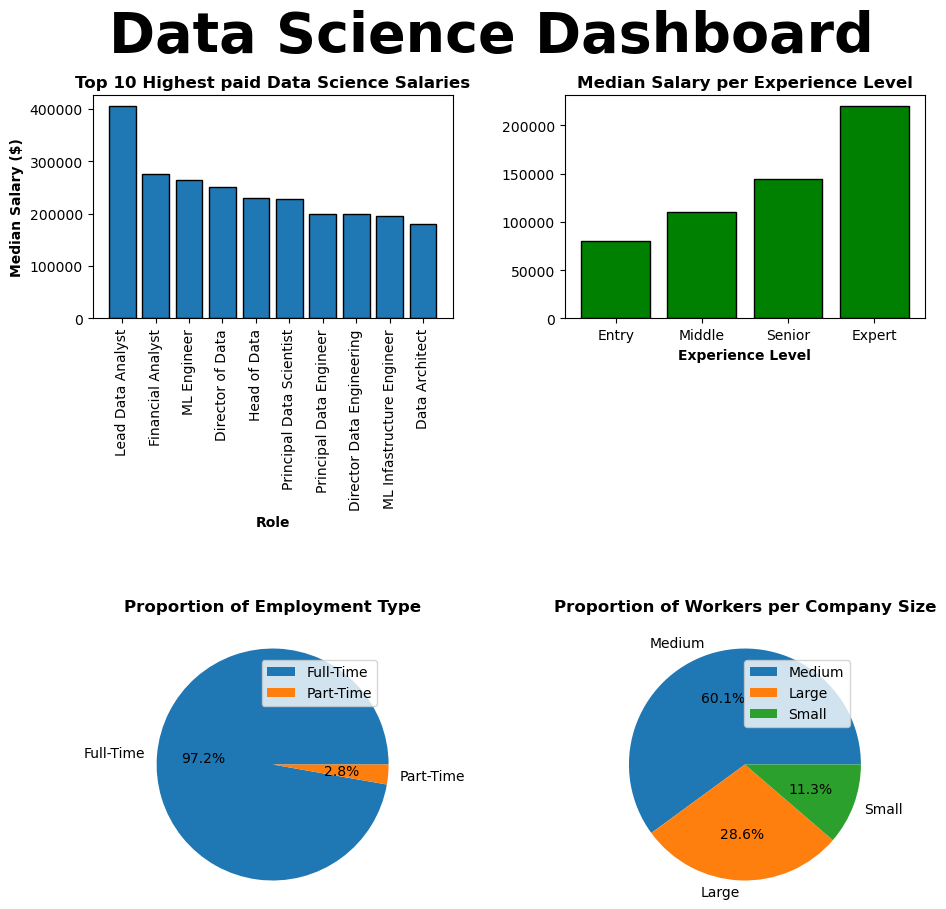

In [4]:
ax, fig = plt.subplots(figsize = (10, 9))

plt.subplots_adjust(top = 10)
plt.suptitle("Data Science Dashboard", fontweight = "bold", fontsize = 40)
plt.subplot(221)
plt.bar(table.index, table.values, edgecolor = "black")
plt.xticks(range(10), rotation = 90, labels = label_roles)
plt.xlabel("Role", fontweight = "bold")
plt.ylabel("Median Salary ($)", fontweight = "bold")
plt.title("Top 10 Highest paid Data Science Salaries", fontweight = "bold")

plt.subplot(222)
plt.bar(table1.index, table1.values, color = "g", edgecolor = "black")
plt.xlabel("Experience Level", fontweight = "bold")
plt.title("Median Salary per Experience Level", fontweight = "bold")
plt.xticks(range(4), labels = ["Entry", "Middle", "Senior", "Expert"])

plt.subplot(223)
plt.pie(value1, labels = label1, autopct='%1.1f%%', radius = 1.3)
plt.title("Proportion of Employment Type", fontweight = "bold", pad = 30)
plt.legend()

plt.subplot(224)
plt.pie(value2, labels = label2, autopct='%1.1f%%', radius = 1.3)
plt.title("Proportion of Workers per Company Size", fontweight = "bold", pad = 30)
plt.legend()

plt.tight_layout()
plt.subplots_adjust(hspace=1.5)
plt.show()


Last, I conducted a Tuskey HSD A/B Test in order to determine whether the difference in median salary between the different experiance levels were significant.

In [5]:
results1 = pairwise_tukeyhsd(s_usd.salary, s_usd.experience_level)
print("* A/B test for difference in Salaries among experience levels: ", results1)
results2 = pairwise_tukeyhsd(s_usd.salary, s_usd.company_size)
print("* A/B test for difference in Salaries among company sizes: ", results2)
results3 = pairwise_tukeyhsd(s_usd.salary, s_usd.work_year)
print("* A/B test for difference in Salaries within last 3 years: ", results3)

* A/B test for difference in Salaries among experience levels:         Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------
    EN     EX  156430.2222    0.0  110253.3212 202607.1232   True
    EN     MI   41515.8838 0.0017   12130.5832  70901.1845   True
    EN     SE   71970.9378    0.0   45488.1154  98453.7601   True
    EX     MI -114914.3384    0.0 -157724.6873 -72103.9894   True
    EX     SE  -84459.2845    0.0  -125331.891 -43586.6779   True
    MI     SE   30455.0539 0.0006   10411.1104  50498.9975   True
-----------------------------------------------------------------
* A/B test for difference in Salaries among company sizes:        Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     L      M -23296.116